In [626]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import missingno as msno

# Part 1: Data Exploration and Evaluation

In [627]:
#Read Data
data=pd.read_csv("loan.csv")
data.head()
data.tail()

/Users/baileyliao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


In [628]:
#Create Dataframe with only relevant variables
df = data[['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'annual_inc', 'issue_d', 'dti', 'revol_bal', 'total_pymnt', 'loan_status']]
df.head(20)

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
0,5000.0,5000.0,36 months,10.65,B,24000.00,Dec-2011,27.65,13648.0,5861.071414,Fully Paid
1,2500.0,2500.0,60 months,15.27,C,30000.00,Dec-2011,1.00,1687.0,1008.710000,Charged Off
2,2400.0,2400.0,36 months,15.96,C,12252.00,Dec-2011,8.72,2956.0,3003.653644,Fully Paid
3,10000.0,10000.0,36 months,13.49,C,49200.00,Dec-2011,20.00,5598.0,12226.302212,Fully Paid
4,3000.0,3000.0,60 months,12.69,B,80000.00,Dec-2011,17.94,27783.0,3242.170000,Current
5,5000.0,5000.0,36 months,7.90,A,36000.00,Dec-2011,11.20,7963.0,5631.377753,Fully Paid
6,7000.0,7000.0,60 months,15.96,C,47004.00,Dec-2011,23.51,17726.0,8136.840000,Current
7,3000.0,3000.0,36 months,18.64,E,48000.00,Dec-2011,5.35,8221.0,3938.144334,Fully Paid
8,5600.0,5600.0,60 months,21.28,F,40000.00,Dec-2011,5.55,5210.0,646.020000,Charged Off
9,5375.0,5375.0,60 months,12.69,B,15000.00,Dec-2011,18.08,9279.0,1476.190000,Charged Off


In [629]:
#Check for missing values
df.isnull().sum(axis = 0)
#only annual_inc has missing values, will handle after correlation

loan_amnt      0
funded_amnt    0
term           0
int_rate       0
grade          0
annual_inc     4
issue_d        0
dti            0
revol_bal      0
total_pymnt    0
loan_status    0
dtype: int64

In [630]:
#looking at categorical variables
df.select_dtypes(include=['category', object]).columns

Index(['term', 'grade', 'issue_d', 'loan_status'], dtype='object')

For term, I'm going to remove string 'months' and turn it into an int. <br>
For grade, I'm going to hot encode into numerics such that A = 1, B = 2, ...<br>
For issue_d, I will conduct independent analysis on how issue_d correlates with loan_status with time series analysis. <br>
For loan status, I'm going to hot encode into numerics, similar to grade.

In [631]:
#Create new dataframe with formatted term and grade columns
df_final = df[['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'issue_d', 'dti', 'revol_bal', 'total_pymnt']]

In [632]:
#Format Term as an int
df['term'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df['term'] = list(map(lambda x: int(x), df['term']))
df_final['term'] = df['term']

#Format Grades where A = 1, B = 2, ...
df['grade'] = pd.Categorical(df['grade'])
df['grade'] = pd.factorize(df['grade'], sort=True)[0] + 1 
df_final['grade'] = df['grade']

#Format Loan Status in alphabetical order starting from 1
#Charged off = 1, Current = 2, Default = 3, Does not meet the credit policy. Status:Charged Off = 4, Does not meet the credit policy. Status:Fully Paid = 5, Fully Paid = 6, In Grace Period = 7, Issued = 8, Late (16-30 days) = 9, Fully Paid = 10 
df['loan_status'] = pd.Categorical(df['loan_status'])
df['loan_status'] = pd.factorize(df['loan_status'], sort=True)[0] + 1 
df_final['loan_status'] = df['loan_status']

df_final

/Users/baileyliao/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/baileyliao/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/baileyliao/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

,loan_amnt,funded_amnt,int_rate,annual_inc,issue_d,dti,revol_bal,total_pymnt,term,grade,loan_status
0,5000.0,5000.0,10.65,24000.00,Dec-2011,27.65,13648.0,5861.071414,36,2,6
1,2500.0,2500.0,15.27,30000.00,Dec-2011,1.00,1687.0,1008.710000,60,3,1
2,2400.0,2400.0,15.96,12252.00,Dec-2011,8.72,2956.0,3003.653644,36,3,6
3,10000.0,10000.0,13.49,49200.00,Dec-2011,20.00,5598.0,12226.302212,36,3,6
4,3000.0,3000.0,12.69,80000.00,Dec-2011,17.94,27783.0,3242.170000,60,2,2
5,5000.0,5000.0,7.90,36000.00,Dec-2011,11.20,7963.0,5631.377753,36,1,6
6,7000.0,7000.0,15.96,47004.00,Dec-2011,23.51,17726.0,8136.840000,60,3,2
7,3000.0,3000.0,18.64,48000.00,Dec-2011,5.35,8221.0,3938.144334,36,5,6
8,5600.0,5600.0,21.28,40000.00,Dec-2011,5.55,5210.0,646.020000,60,6,1
9,5375.0,5375.0,12.69,15000.00,Dec-2011,18.08,9279.0,1476.190000,60,2,1


In [633]:
#Correlation Analysis
correlation = df_final.corr()
print(correlation['loan_status'].sort_values(ascending = False),'\n')

loan_status    1.000000
total_pymnt    0.416420
int_rate       0.029134
annual_inc    -0.005150
grade         -0.014924
revol_bal     -0.035033
dti           -0.046711
loan_amnt     -0.069305
funded_amnt   -0.070626
term          -0.098785
Name: loan_status, dtype: float64 



In [634]:
correlation

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt,term,grade,loan_status
loan_amnt,1.000000,0.999263,0.145023,0.332698,0.020675,0.333580,0.474626,0.411717,0.150873,-0.069305
funded_amnt,0.999263,1.000000,0.145160,0.332466,0.021075,0.333435,0.473286,0.410760,0.150632,-0.070626
int_rate,0.145023,0.145160,1.000000,-0.072786,0.079903,-0.035708,0.170506,0.428058,0.954146,0.029134
annual_inc,0.332698,0.332466,-0.072786,1.000000,-0.087410,0.295784,0.160879,0.058360,-0.064427,-0.005150
dti,0.020675,0.021075,0.079903,-0.087410,1.000000,0.067277,-0.041529,0.051077,0.083544,-0.046711
revol_bal,0.333580,0.333435,-0.035708,0.295784,0.067277,1.000000,0.138328,0.091102,-0.029947,-0.035033
total_pymnt,0.474626,0.473286,0.170506,0.160879,-0.041529,0.138328,1.000000,0.083078,0.084698,0.416420
term,0.411717,0.410760,0.428058,0.058360,0.051077,0.091102,0.083078,1.000000,0.442701,-0.098785
grade,0.150873,0.150632,0.954146,-0.064427,0.083544,-0.029947,0.084698,0.442701,1.000000,-0.014924
loan_status,-0.069305,-0.070626,0.029134,-0.005150,-0.046711,-0.035033,0.416420,-0.098785,-0.014924,1.000000


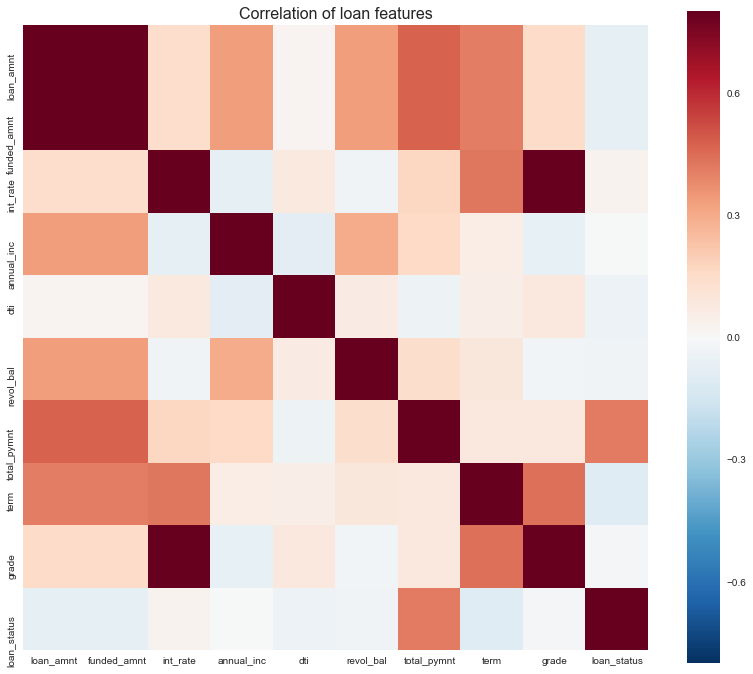

In [635]:
#Looking at correlations heatmap
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of loan features',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

I was originally planning to see if annual_income was correlated with any other variable, and then would estimate annual income based on that correlation. However, since no correlation is strong and there are only 4 missing values out of ~900K, I decided to drop them.

Since we see funded amount and loan ammount almost perfectly correlated (0.999) and logistic regression assumes little to none multicollinearity, I drop loan amount as there is a weaker absolute correlation with loan status. 

In [636]:
#dropping missing values and loan amount
df_final = df_final.dropna()
df_final = df_final.drop(['loan_amnt'], axis=1)

In [637]:
#Looking at relationship between issue date and loan status
df_final['issue_month'], df_final['issue_year'] = df_final['issue_d'].str.split('-', 1).str
df_final

,funded_amnt,int_rate,annual_inc,issue_d,dti,revol_bal,total_pymnt,term,grade,loan_status,issue_month,issue_year
0,5000.0,10.65,24000.00,Dec-2011,27.65,13648.0,5861.071414,36,2,6,Dec,2011
1,2500.0,15.27,30000.00,Dec-2011,1.00,1687.0,1008.710000,60,3,1,Dec,2011
2,2400.0,15.96,12252.00,Dec-2011,8.72,2956.0,3003.653644,36,3,6,Dec,2011
3,10000.0,13.49,49200.00,Dec-2011,20.00,5598.0,12226.302212,36,3,6,Dec,2011
4,3000.0,12.69,80000.00,Dec-2011,17.94,27783.0,3242.170000,60,2,2,Dec,2011
5,5000.0,7.90,36000.00,Dec-2011,11.20,7963.0,5631.377753,36,1,6,Dec,2011
6,7000.0,15.96,47004.00,Dec-2011,23.51,17726.0,8136.840000,60,3,2,Dec,2011
7,3000.0,18.64,48000.00,Dec-2011,5.35,8221.0,3938.144334,36,5,6,Dec,2011
8,5600.0,21.28,40000.00,Dec-2011,5.55,5210.0,646.020000,60,6,1,Dec,2011
9,5375.0,12.69,15000.00,Dec-2011,18.08,9279.0,1476.190000,60,2,1,Dec,2011


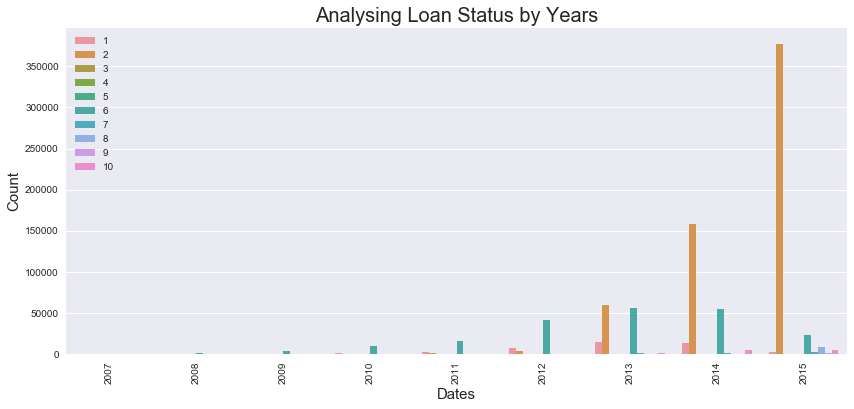

In [638]:
plt.figure(figsize = (14,6))
#Looking at loan status by year, 3 is Default
g = sns.countplot(x='issue_year', data=df_final,
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Loan Status by Years", fontsize=20)
plt.show()

/Users/baileyliao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


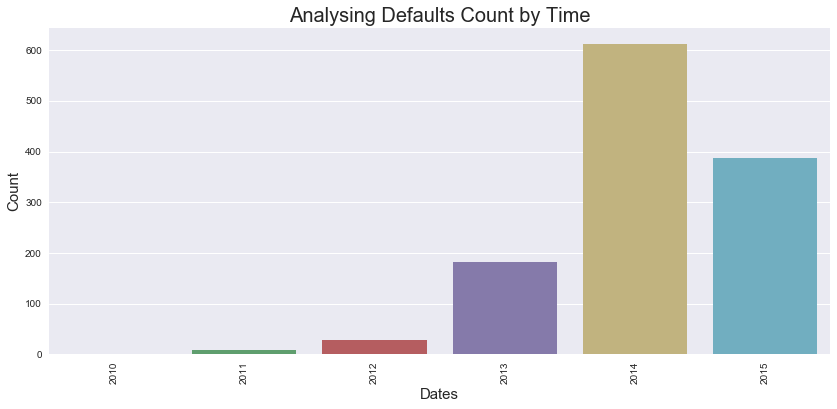

In [639]:
#Zooming into defaults by year
plt.figure(figsize = (14,6))
g = sns.countplot(x='issue_year', data=df_final[df_final['loan_status'] == 3])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Defaults Count by Time", fontsize=20)
plt.show()

There seems to have been a spike of defaults in 2014. This could be due to the terms of the loans given during the housing crisis in 2008-2012. 2014 could be the year where interest rates rose and borrowers were not able to pay.

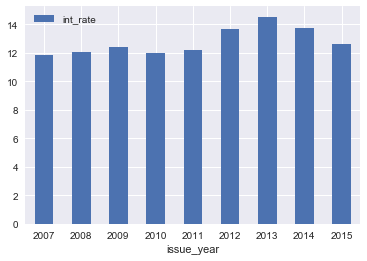

In [640]:
grouped = df_final.groupby('issue_year').mean()
grouped
grouped.plot.bar(y='int_rate', rot=0)

We see 2013 have the highest interest rate which would support the hypothesis that borrowers were not able to keep up with these rates in 2014.

Next, I look at the distribution of each numeric variable and the relationship to loan status for each categorical variable. Since we are looking at a logistic regression model, where normality is not assumed, I am leaving the variables as is without transforming them.

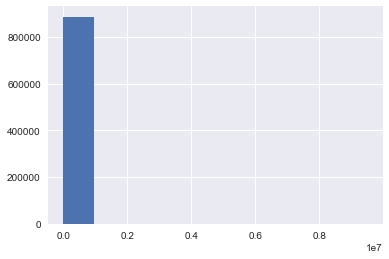

In [641]:
df_final['annual_inc'].hist()

There seems to be outliers that is causing this distribution to be skewed right.

In [642]:
#identify outliers in annual income
outliers = df_final[df_final['annual_inc'] > df_final['annual_inc'].mean() + 3 * df_final['annual_inc'].std()]
len(outliers)

7083

There are 7083 outliers in annual_income, I'm assuming high annual income in the non-outliers will more accurately predict loan status then the extremely high outliers, thus I am dropping these 7083 out of ~900K.

In [643]:
#drop outliers
df_final = df_final[~df_final.isin(outliers)].dropna()

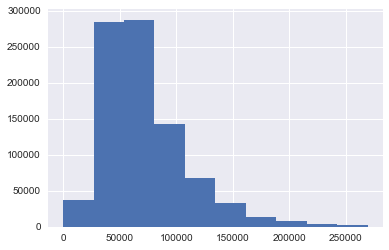

In [644]:
df_final['annual_inc'].hist()

Distribution looks much better taking out outliers. We would expect this to be right skewed as there will be few people with higher end annual income.

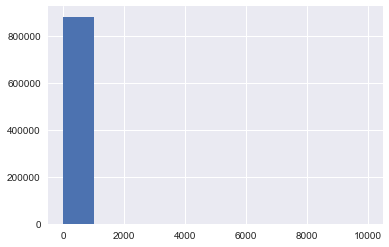

In [645]:
df_final['dti'].hist()

As with annual income, looks like there are outlier's in dti affecting the histogram.

In [646]:
outliers_dti = df_final[df_final['dti'] > df_final['dti'].mean() + 3 * df_final['dti'].std()]
len(outliers_dti)

20

With only 20 outliers, I will assume the rest of the data adequently reflects dti data and will remove these 20.

In [647]:
#drop outliers in dti
df_final = df_final[~df_final.isin(outliers_dti)].dropna()

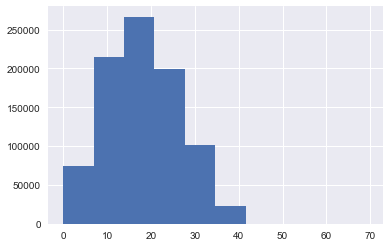

In [648]:
df_final['dti'].hist()

Distribution is normal after dropping outliers.

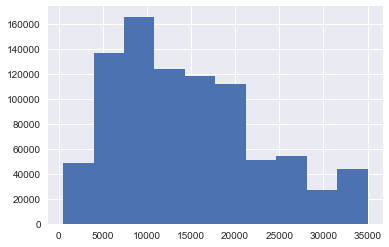

In [649]:
df_final['funded_amnt'].hist()

Fairly normal distribution which should be the distribution of money that is being given.

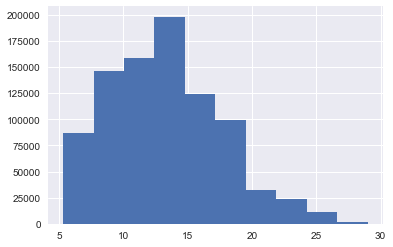

In [650]:
df_final['int_rate'].hist()

This distribution indicates more people are getting interest rates from 5-20% with a right tail where borrowers are getting >20% interest rates. This makes sense as high interest rates would indicate riskier loans which should be avoided.

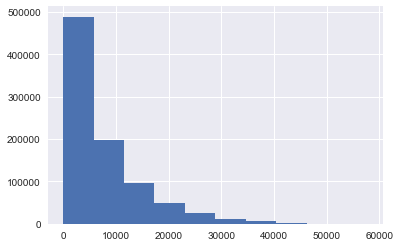

In [651]:
df_final['total_pymnt'].hist()

Total payment has a right skew distribution. We should expect the amount borrowers are paying at this point in time to be skewed right as they are paying over time. 

Looking at relationships for grades vs defaults and term vs defaults

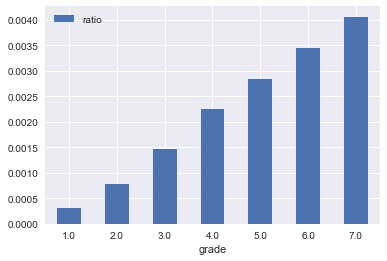

In [652]:
#Finding counts defaults in each grade group/total counts in each grade group giving us ratio of defaults to total
grouped_grade = df_final[df_final['loan_status'] == 3].groupby('grade').count()
grouped_len = df_final.groupby('grade').count()
grouped_len
grouped_grade['len'] = grouped_len['dti']
grouped_grade['ratio'] = grouped_grade['loan_status']/grouped_grade['len']
grouped_grade.plot.bar(y='ratio', rot=0)

Note: These are numbered in alphabetical order with A being 1.

We see lower grades have a higher rate of default than higher grades which makes sense: lower grades should have higher risk of default. 

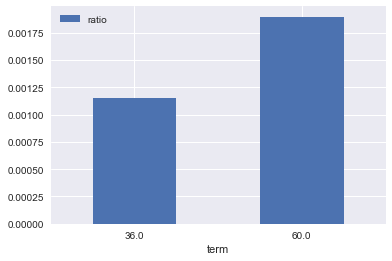

In [653]:
#Finding counts defaults in each term group/total counts in each term group giving us ratio of defaults to total
grouped_term = df_final[df_final['loan_status'] == 3].groupby('term').count()
grouped_termlen = df_final.groupby('term').count()
grouped_termlen
grouped_term['len'] = grouped_termlen['dti']
grouped_term['ratio'] = grouped_term['loan_status']/grouped_term['len']
grouped_term.plot.bar(y='ratio', rot=0)

We see higher rate of defaults in longer term loans.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x3d24cdc18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x3c822bda0>]], dtype=object)

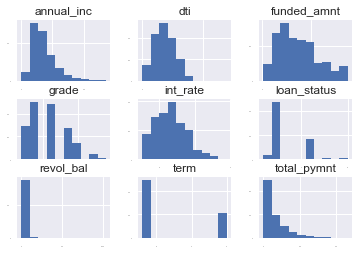

In [654]:
#Histogram with all the variables
df_final.hist(xlabelsize = 0, ylabelsize = 0)

In [655]:
#Overall descriptive summary statistics for features
df_final.describe()

,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt,term,grade,loan_status
count,880272.000000,880272.00000,880272.000000,880272.000000,8.802720e+05,880272.000000,880272.000000,880272.000000,880272.000000
mean,14655.386233,13.25460,72175.770943,18.198170,1.652253e+04,7520.842766,43.202955,2.800344,3.111523
std,8369.322533,4.37899,38195.561229,8.285701,1.940353e+04,7820.286043,10.999477,1.311920,2.019106
min,500.000000,5.32000,1896.000000,0.000000,0.000000e+00,0.000000,36.000000,1.000000,1.000000
25%,8000.000000,9.99000,45000.000000,12.000000,6.422000e+03,1907.720000,36.000000,2.000000,2.000000
50%,12975.000000,12.99000,64000.000000,17.730000,1.181400e+04,4876.945000,36.000000,3.000000,2.000000
75%,20000.000000,16.20000,90000.000000,24.000000,2.065200e+04,10581.960000,60.000000,4.000000,6.000000
max,35000.000000,28.99000,269000.000000,69.350000,1.039903e+06,57777.579870,60.000000,7.000000,10.000000


# Part 2: Business Analysis

In [656]:
# 1) What percentage of loans have been fully paid
#Assuming Does not meet credit policy. Status:Fully paid is not included, I'm only counting borrowers with loan status = Fully Paid
print('Percentage of loans that have been fully paid: ' + str(round(len(df_final[df_final['loan_status'] == 6])/len(df_final)*100, 2)) + '%')

Percentage of loans that have been fully paid: 23.43%


In [657]:
# 2) When bucketed by year of origination and grade, which cohort has the highest rate of defaults? Here you may assume that any loan which was not fully paid had “defaulted”.

#Categorizing default as 0 and fully paid as 1 (assuming Does not meet credit policy. Status: Fully paid is not included)
df_final['loan_status_target'] = df_final['loan_status'].apply(lambda x: 1 if x == 6 else 0)

#calculating count of defaults in a year-grade cohort/total counts in cohort
grouped_default = df_final[df_final['loan_status_target'] == 0].groupby(['issue_year', 'grade']).count()
grouped_total = df_final.groupby(['issue_year', 'grade']).count()
grouped_default['len'] = grouped_total['loan_status']
grouped_default['rate'] = grouped_default['loan_status_target']/grouped_default['len']*100

#finding max default rate value
print('Max default rate value: ' + str(grouped_default['rate'].max()) + '%')

#finding cohort of max default rate value
print('cohort of max default rate value: ' + str(grouped_default['rate'].argmax()))
print('7 correlates with a grade of G so cohort is Grade G and year 2007')

Max default rate value: 100.0%
cohort of max default rate value: ('2007', 7.0)
7 correlates with a grade of G so cohort is Grade G and year 2007


In [658]:
# 3) When bucketed by year of origination and grade, what annualized rate of return have these loans generated on average?

#Find rate of return for each cohort
grouped_default_3 = df_final.groupby(['issue_year', 'grade']).sum()
grouped_default_3['rate of return'] = (grouped_default_3['total_pymnt']/grouped_default_3['funded_amnt']) ** (1/3) - 1

#Weighted average to find overall rate of return
weighted_avg = np.average(grouped_default_3['rate of return'], weights=grouped_default['len'])
print('Weighted Average of annualized rate of returns: ' + str(round(weighted_avg*100, 2)) + '%')

Weighted Average of annualized rate of returns: -23.12%


# Part 3: Modeling

In [659]:
#drop date as I am going to use year and month as predictors
df_final = df_final.drop(['issue_d'], axis=1)
#drop loan status since we have loan status target
df_final = df_final.drop(['loan_status'], axis=1)

In [660]:
#hot encoding month to numerics
df_final['issue_month'] = pd.Categorical(df_final['issue_month'])
df_final['issue_month'] = pd.factorize(df_final['issue_month'], sort=True)[0] + 1 

In [661]:
#Generate Test and Train split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final[df_final.columns.difference(['loan_status_target'])], df_final['loan_status_target'], test_size=0.33, random_state=42)


In [662]:
#Model and score
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
clf.score(X_test, y_test)

0.96078350373506838

In [663]:
#Deep dive into model performance
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.96      0.97    222300
          1       0.88      0.96      0.92     68190

avg / total       0.96      0.96      0.96    290490



Out of everyone that is fully paid (1) we classified 96% of them as fully paid. Out of everyone that is defaulting (0), we classified 96% of them as defaulting. These are found in the recall column.

Out of all the people we classified as fully paid (1), 88% of them are fully paid. Out of all the people we classified as defaulting (0), 99% of them are defaulting. These are found in the precision column.

It is important that our precision and recall for defaulting is high since these are the people that we would consider to be high risk loans. The model created here shows a high precision and recall, as well as a f-score close to 1, which indicates the model is performing as it should.

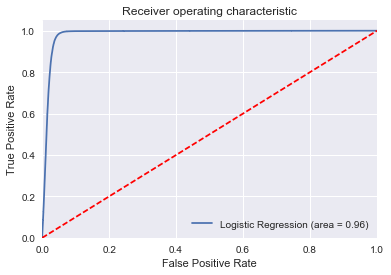

In [664]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Our ROC curve shows a really good model where it is close to the top left of the graph and away from the dotted line.

Overall, from the classification report and the ROC curve, the model I created preforms well in identifying who will default on loans and thus, should be identified as high risk borrowers.